In [16]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as pt
import scipy.linalg as la

Iteracija 1: x = [-86.78831377 260.09018107], norm(r) = 2.720057e+05
Iteracija 2: x = [-42.70777041 130.14064926], norm(r) = 6.799979e+04
Iteracija 3: x = [-20.7196116  65.1768233], norm(r) = 1.699830e+04
Iteracija 4: x = [-9.83572344 32.71756587], norm(r) = 4.247902e+03
Iteracija 5: x = [-4.63640738 16.53661412], norm(r) = 1.060242e+03
Iteracija 6: x = [-2.58155261  8.55801427], norm(r) = 2.632151e+02
Iteracija 7: x = [-2.48517837  4.83317648], norm(r) = 6.379794e+01
Iteracija 8: x = [-2.76623807  3.42692152], norm(r) = 1.387442e+01
Iteracija 9: x = [-2.80313899  3.1437735 ], norm(r) = 1.979130e+00
Iteracija 10: x = [-2.80511448  3.13133664], norm(r) = 8.018437e-02
Iteracija 11: x = [-2.80511809  3.13131252], norm(r) = 1.547246e-04
Konvergencija postignuta (mali gradijent) u iteraciji 11.
Rezidual [1.29904976e-11 5.81894533e-10]
Iteracije:
[[-175.          520.        ]
 [ -86.78831377  260.09018107]
 [ -42.70777041  130.14064926]
 [ -20.7196116    65.1768233 ]
 [  -9.83572344   32.71

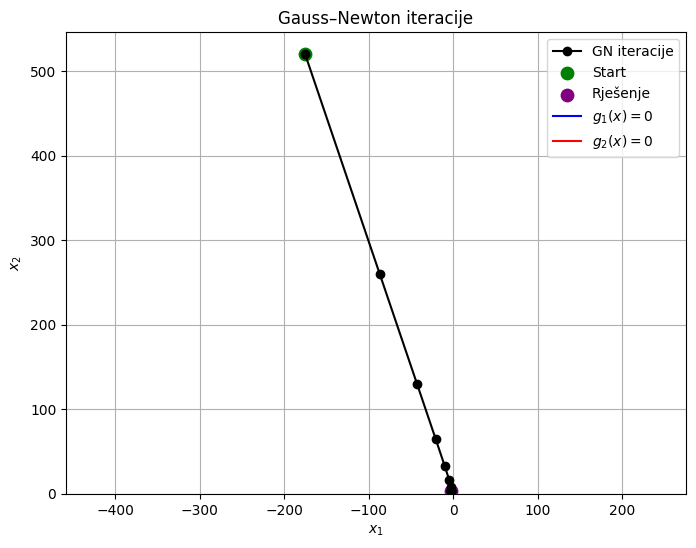

In [62]:
import numpy as np
import matplotlib.pyplot as plt
# ---------------------------------------------------------
# 1. Definicija reziduala r(x)
# ---------------------------------------------------------

#x1_values=[8,10,0,-8]
#x2_values=[8,-10,10,0]

def residual(x):
  x1,x2=x
  r1 = (x1**2+x2-11)
  r2 = (x1+x2**2-7)
  return np.array([r1, r2])

# ---------------------------------------------------------
# 2. Jacobian matrica J(x)
# J_ij = ∂r_i/∂x_j
# ---------------------------------------------------------

def jacobian(x):
  x1, x2 = x
  J = np.array([
  [2*x1, 1 ], # gradijent g1
  [1, 2*x2 ] # gradijent g2
  ])
  return J

# ---------------------------------------------------------
# 3. Gauss–Newton algoritam
# ---------------------------------------------------------

def gauss_newton(x0, tol=1e-8, max_iter=20):
  x = x0.astype(float)
  xs = [x.copy()] # spremamo sve iteracije

  for k in range(max_iter):
    r = residual(x)
    J = jacobian(x)

    # Jedini kriterij optimalnosti: ||J^T r|| < tol
    grad = J.T @ r
    if np.linalg.norm(grad) < tol:
      print(f"Konvergencija postignuta (mali gradijent) u iteraciji {k}.")
      print(f"Rezidual {r}")
      break

    # GN sustav
    lhs = J.T @ J
    rhs = -grad
    p = np.linalg.solve(lhs, rhs)

    x = x + p # ažuriraj x

    print(f"Iteracija {k+1}: x = {x}, norm(r) = {np.linalg.norm(r):.6e}")
    xs.append(x.copy().ravel())


  return np.array(xs)


# ------------------------------
# 3. Izračun iteracija
# ------------------------------
x0 = np.array([-175, 520])
iters = gauss_newton(x0)
x_star = iters[-1]

print("Iteracije:")
print(iters)
print("Rješenje:", x_star)
print("Rezidual:", residual(x_star))

# ------------------------------
# 4. Grafički prikaz
# ------------------------------

# Mreža za graf
x1_vals = np.linspace(-1, 1.5, 400)
x2_vals = np.linspace(-0.5, 2, 400)
X1, X2 = np.meshgrid(x1_vals, x2_vals)

# Krivulje g1=0 i g2=0
G1 = X1**2 + X2**2 - 1
G2 = np.exp(X1) + X2 - 2

plt.figure(figsize=(8, 6))

# Krivulje g1=0 i g2=0
cs1 = plt.contour(X1, X2, G1, levels=[0], colors='blue')
cs2 = plt.contour(X1, X2, G2, levels=[0], colors='red')

# Iteracije GN
plt.plot(iters[:,0], iters[:,1], 'ko-', label='GN iteracije')
plt.scatter(iters[0,0], iters[0,1], c='green', s=80, label='Start')
plt.scatter(x_star[0], x_star[1], c='purple', s=80, label='Rješenje')

# Ručni upis legende (konture nemaju label pa im moramo dati)
plt.plot([], [], color='blue', label=r'$g_1(x)=0$')
plt.plot([], [], color='red', label=r'$g_2(x)=0$')

plt.legend()
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Gauss–Newton iteracije')
plt.grid(True)
plt.axis('equal')
plt.show()

In [51]:
import numpy as np

# -------------------------------------------------
# Rosenbrock u least-squares obliku
# -------------------------------------------------

def residuals(theta):

    x, y = theta

    return np.array([
        (x**2+y-11),
        (x+y**2-7)
    ])

def jacobian(theta):
    """
    Jacobian reziduala J(theta)
    """
    x, y = theta
    return np.array([
        [2*x, 1 ], # gradijent g1
        [1, 2*y ]
    ])

def cost(theta):
    """
    Funkcija cilja: 1/2 * ||r||^2
    """
    r = residuals(theta)
    return 0.5 * np.dot(r, r)

# -------------------------------------------------
# Levenberg–Marquardt algoritam
# -------------------------------------------------

theta = np.array([-8.0, 0])   # početna točka
lam = 10**(2)                       # početni damping
max_iter = 50                   # sigurnosni limit

tol_grad = 1e-8                 # tolerancija za J^T r
tol_step = 1e-8                 # tolerancija za ||delta||

print(" iter |        x        y    |     f(x,y)     | lambda")
print("-----------------------------------------------------------")

for k in range(max_iter):

    r = residuals(theta)
    J = jacobian(theta)
    cost_old = cost(theta)

    # gradijent LS funkcije
    grad = J.T @ r

    # kriterij zaustavljanja (stacionarna točka)
    if np.linalg.norm(grad, np.inf) < tol_grad:
        print("Zaustavljeno: ||J^T r|| dovoljno mali")
        break

    accepted = False

    # -------------------------------------------------
    # UNUTARNJA LM PETLJA (traženje prihvatljivog koraka)
    # -------------------------------------------------
    while not accepted:

        A = J.T @ J + lam * np.eye(2)
        g = -J.T @ r                      # VAŽNO: minus!

        delta = np.linalg.solve(A, g)

        # mali korak → konvergencija
        if np.linalg.norm(delta) < tol_step:
            print("Zaustavljeno: ||delta|| dovoljno mali")
            accepted = True
            break

        theta_new = theta + delta

        if cost(theta_new) < cost_old:
            theta = theta_new
            lam *= 0.5                   # smanji damping
            accepted = True
        else:
            lam *= 2.0                  # povećaj damping

    print(f"{k:4d} | {theta[0]: .6f} {theta[1]: .6f} | "
          f"{cost(theta): .6e} | {lam: .2e}")

print("\nKonačno rješenje:")
print("theta =", theta)
print("f =", cost(theta))


 iter |        x        y    |     f(x,y)     | lambda
-----------------------------------------------------------
   0 | -5.589034 -0.142817 |  2.808794e+02 |  5.00e+01
   1 | -4.251651 -0.306343 |  8.516604e+01 |  2.50e+01
   2 | -3.578814 -0.589670 |  5.307979e+01 |  1.25e+01
   3 | -3.387129 -1.374455 |  3.651466e+01 |  6.25e+00
   4 | -3.643551 -3.056174 |  1.154120e+00 |  3.12e+00
   5 | -3.770334 -3.270335 |  4.338449e-03 |  1.56e+00
   6 | -3.778956 -3.282655 |  7.207473e-06 |  7.81e-01
   7 | -3.779303 -3.283174 |  3.341547e-09 |  3.91e-01
   8 | -3.779310 -3.283186 |  3.986964e-13 |  1.95e-01
   9 | -3.779310 -3.283186 |  1.203103e-17 |  9.77e-02
Zaustavljeno: ||delta|| dovoljno mali
  10 | -3.779310 -3.283186 |  1.203103e-17 |  9.77e-02
Zaustavljeno: ||delta|| dovoljno mali
  11 | -3.779310 -3.283186 |  1.203103e-17 |  9.77e-02
Zaustavljeno: ||delta|| dovoljno mali
  12 | -3.779310 -3.283186 |  1.203103e-17 |  9.77e-02
Zaustavljeno: ||delta|| dovoljno mali
  13 | -3.779310 -

Zadatak 7.1.1.
<br>
LM
<br>
0,0 tocka je 7 iteracija i F je f = 1.496547727329947e-19
<br>
-3,-3 tocka je 5. iteracija s [-3.77931025 -3.28318599] f = 5.720011001528754e-20

<br>
GN
<br>
0,0 tocka je 3,2 minimum i 7 iteracija norm(r) = 1.373102e-04
<br>
-3,-3 tocka [-3.77931025 -3.28318599] 4 iteracija i norm(r) = 2.267880e-06
<br>

LM
<br>
8,8
<br>
10 |  3.000000  2.000000 |  6.626595e-19 |  4.88e-02
<br>
Zaustavljeno: ||J^T r|| dovoljno mali
<br>
<br>
Za tocku -8,0
Zaustavljeno: ||delta|| dovoljno mali
  49 | -3.779310 -3.283186 |  1.203103e-17 |  9.77e-02

Konačno rješenje:
<br>
theta = [-3.77931025 -3.28318599]
<br>
f = 1.2031033258891815e-17
<br>


<br>
Konačno rješenje:
<br>
theta = [3. 2.]
<br>
f = 6.626595143888715e-19
<br>

GN
<br>
6 iter za tocku 8,8
<br>
[3.         2.        ]]
<br>
Rješenje: [3. 2.]
<br>
Rezidual: [3.55271368e-15 3.73034936e-14]
<br>
<br>
12. iter za tocku -8,0
<br>
Rješenje: [3. 2.]
<br>
Rezidual: [0. 0.]
<br>

<br>
7.1.2.
<br>
Konačno rješenje za lambda 10-6:
   0 | -3.885714 -3.314286 |  3.125902e-01 |  5.00e-07
   1 | -3.780815 -3.283559 |  6.098796e-05 |  2.50e-07
   2 | -3.779311 -3.283186 |  2.571763e-12 |  1.25e-07
   3 | -3.779310 -3.283186 |  5.140218e-27 |  6.25e-08
<br>
theta = [-3.77931025 -3.28318599]
<br>
f = 5.140217658420113e-27
<br>
<br>

<br>
Konačno rješenje za lambda 10-2:
<br>
   0 | -3.885416 -3.314104 |  3.108282e-01 |  5.00e-03
   1 | -3.780817 -3.283563 |  6.110675e-05 |  2.50e-03
   2 | -3.779311 -3.283186 |  3.975260e-12 |  1.25e-03
   3 | -3.779310 -3.283186 |  2.832028e-21 |  6.25e-04
<br>
Konačno rješenje:
<br>
theta = [-3.77931025 -3.28318599]
<br>
f = 2.8320278469111662e-21
<br>
<br>

<br>
Konačno rješenje za lambda 10e2:
<br>
Zaustavljeno: ||delta|| dovoljno mali
  49 | -3.779310 -3.283186 |  3.433789e-16 |  1.95e-01

<br>
Konačno rješenje:
<br>
theta = [-3.77931025 -3.28318599]
<br>
f = 3.4337894928811403e-16
<br>
Što veća lambda je veća iteracija

Iteracija 1: x = [ 7. 11.], f = 1.700000e+02
Iteracija 2: x = [3.88273616 5.64169381], f = 1.704200e+04
Iteracija 3: x = [2.94839974 3.17992349], f = 9.187737e+02
Iteracija 4: x = [2.96232377 2.22483177], f = 3.748950e+01
Iteracija 5: x = [2.99825598 2.0117522 ], f = 8.321092e-01
Iteracija 6: x = [2.99999456 2.00003568], f = 2.063091e-03
Iteracija 7: x = [3. 2.], f = 1.885408e-08

Rješenje:
x = [3. 2.]
f = 1.6214369429572632e-18


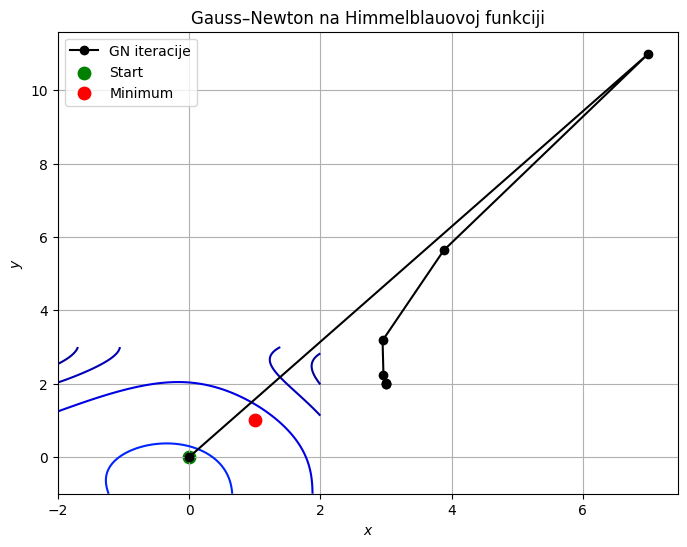

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------
# 1. Reziduali i Jakobijan
# ------------------------------

def residual(x):
    x1, x2 = x
    r1 = (x1**2 + x2 - 11)
    r2 = (x1 + x2**2 -7)
    return np.array([r1, r2])

def jacobian(x):
    x1, x2 = x
    J = np.array([
        [2*x1, 1],   # gradijent g1
        [1, 2*x2]    # gradijent g2
    ])
    return J

# ------------------------------
# 2. Gauss–Newton metoda
# ------------------------------

def gauss_newton(x0, tol=1e-8, max_iter=50):
    x = x0.astype(float)
    xs = [x.copy()]

    for k in range(max_iter):
        r = residual(x)
        J = jacobian(x)

        grad = J.T @ r
        if np.linalg.norm(grad) < tol:
            break

        p = np.linalg.solve(J.T@J, -grad)
        x = x + p
        xs.append(x.copy())

        print(f"Iteracija {k+1}: x = {x}, f = {np.sum(r*r):.6e}")

    return np.array(xs)

# ------------------------------
# 3. Izvršenje algoritma
# ------------------------------

x0 = np.array([0, 0])
iters = gauss_newton(x0)
x_star = iters[-1]

print("\nRješenje:")
print("x =", x_star)
print("f =", np.sum(residual(x_star)**2))

# ------------------------------
# 4. Graf kontura + iteracije
# ------------------------------

x1_vals = np.linspace(-2, 2, 400)
x2_vals = np.linspace(-1, 3, 400)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
F = (X1*X1+X2-11)**2 + (X1 + X2**2-7)**2

plt.figure(figsize=(8, 6))
plt.contour(X1, X2, F, levels=np.logspace(-2, 3, 20), cmap='jet')

# Iteracije
plt.plot(iters[:,0], iters[:,1], 'ko-', label='GN iteracije')
plt.scatter(iters[0,0], iters[0,1], c='green', s=80, label='Start')
plt.scatter(1, 1, c='red', s=80, label='Minimum')

plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Gauss–Newton na Himmelblauovoj funkciji')
plt.grid(True)
plt.show()


 iter |        x        y    |     f(x,y)     | lambda
-----------------------------------------------------------
   0 | -2.571429  4.285714 |  3.868930e+01 |  1.00e+00
   1 | -2.779966  3.297545 |  5.985684e-01 |  5.00e-01
   2 | -2.804174  3.137202 |  7.170353e-04 |  2.50e-01
   3 | -2.805111  3.131354 |  3.571349e-08 |  1.25e-01
   4 | -2.805118  3.131313 |  3.445012e-13 |  6.25e-02
   5 | -2.805118  3.131313 |  8.315593e-19 |  3.12e-02
Zaustavljeno: ||J^T r|| dovoljno mali

Konačno rješenje:
theta = [-2.80511809  3.13131252]
f = 8.315592933085929e-19


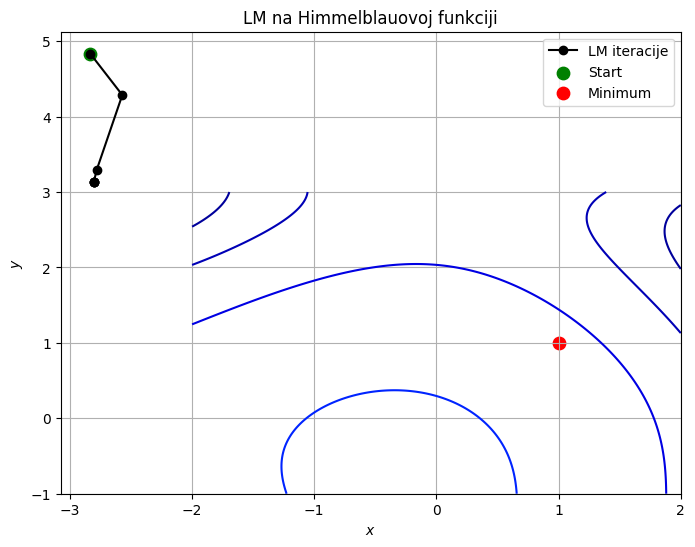

In [66]:
import numpy as np

# -------------------------------------------------
# Rosenbrock u least-squares obliku
# -------------------------------------------------

def residuals(theta):
    """
    Reziduali r(theta)
    r1 = 1 - x
    r2 = 10 * (y - x^2)
    """
    x1, x2 = theta
    return np.array([
        (x1**2 + x2 - 11),
        (x1 + x2**2 -7)
    ])

def jacobian(theta):
    """
    Jacobian reziduala J(theta)
    """
    x, y = theta
    return np.array([
        [2*x, 1],   # gradijent g1
        [1, 2*y]    # gradijent g2
    ])

def cost(theta):
    """
    Funkcija cilja: 1/2 * ||r||^2
    """
    r = residuals(theta)
    return 0.5 * np.dot(r, r)

# -------------------------------------------------
# Levenberg–Marquardt algoritam
# -------------------------------------------------

theta = np.array([-1.0, 1.0])   # početna točka
lam = 1.0                       # početni damping
max_iter = 50                   # sigurnosni limit

tol_grad = 1e-8                 # tolerancija za J^T r
tol_step = 1e-8                 # tolerancija za ||delta||

print(" iter |        x        y    |     f(x,y)     | lambda")
print("-----------------------------------------------------------")
iters = []
for k in range(max_iter):

    r = residuals(theta)
    J = jacobian(theta)
    cost_old = cost(theta)

    # gradijent LS funkcije
    grad = J.T @ r

    # kriterij zaustavljanja (stacionarna točka)
    if np.linalg.norm(grad, np.inf) < tol_grad:
        print("Zaustavljeno: ||J^T r|| dovoljno mali")
        break

    accepted = False

    # -------------------------------------------------
    # UNUTARNJA LM PETLJA (traženje prihvatljivog koraka)
    # -------------------------------------------------
    while not accepted:

        A = J.T @ J + lam * np.eye(2)
        g = -J.T @ r                      # VAŽNO: minus!

        delta = np.linalg.solve(A, g)

        # mali korak → konvergencija
        if np.linalg.norm(delta) < tol_step:
            print("Zaustavljeno: ||delta|| dovoljno mali")
            accepted = True
            break

        theta_new = theta + delta
        iters.append(theta_new)

        if cost(theta_new) < cost_old:
            theta = theta_new
            lam *= 0.5                   # smanji damping
            accepted = True
        else:
            lam *= 2.0                  # povećaj damping

    print(f"{k:4d} | {theta[0]: .6f} {theta[1]: .6f} | "
          f"{cost(theta): .6e} | {lam: .2e}")

print("\nKonačno rješenje:")
print("theta =", theta)
print("f =", cost(theta))

x1_vals = np.linspace(-2, 2, 400)
x2_vals = np.linspace(-1, 3, 400)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
F = (X1*X1+X2-11)**2 + (X1 + X2**2-7)**2

plt.figure(figsize=(8, 6))
plt.contour(X1, X2, F, levels=np.logspace(-2, 3, 20), cmap='jet')

iters = np.asarray(iters, dtype=np.float32)

# Iteracije
plt.plot(iters[:,0], iters[:,1], 'ko-', label='LM iteracije')
plt.scatter(iters[0,0], iters[0,1], c='green', s=80, label='Start')
plt.scatter(1, 1, c='red', s=80, label='Minimum')

plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('LM na Himmelblauovoj funkciji')
plt.grid(True)
plt.show()

In [78]:
import numpy as np

# ---------------------------------------------------------
# 1. Podaci (identični LaTeX primjeru)
# ---------------------------------------------------------


t = np.array([0, 5, 10, 15, 20, 25, 30])
y = np.array([92, 80, 70, 62, 55, 49, 45])

# ---------------------------------------------------------
# 2. Model, reziduali i ciljna funkcija
# ---------------------------------------------------------
def model(t,x):
    return 22 + (x - 22)*np.e(-x*t)

def residual(t):
    return y - model(t,x)

def f(x):
    r = residual(x)
    return 0.5 * np.dot(r, r)

# ---------------------------------------------------------
# 3. Jacobian
# ---------------------------------------------------------
def jacobian(x):
    J = np.zeros((len(t), 2))
    J[:, 0] = -np.exp(x[1] * t)
    J[:, 1] = -x[0] * t * np.exp(x[1] * t)
    return J

# ---------------------------------------------------------
# 4. Levenberg–Marquardt algoritam (s ispisom)
# ---------------------------------------------------------
def levenberg_marquardt(x0, lambda0=1e-2, tol=1e-8, max_iter=20):
    x = x0.astype(float)
    lam = lambda0

    print("Iter |      x0        x1     |      p0        p1     |   lambda   |   f(x)")
    print("--------------------------------------------------------------------------")

    for k in range(max_iter):
        r = residual(x)
        J = jacobian(x)
        g = J.T @ r
        A = J.T @ J

        # LM sustav
        p = np.linalg.solve(A + lam * np.eye(2), -g)

        x_new = x + p

        print(f"{k:4d} | {x[0]:9.6f} {x[1]:9.6f} | "
              f"{p[0]:9.6f} {p[1]:9.6f} | "
              f"{lam:9.2e} | {f(x):7.6f}")

        # provjera uspješnosti
        if f(x_new) < f(x):
            x = x_new
            lam = lam / 2
        else:
            lam = 2 * lam

        # kriterij zaustavljanja (mali gradijent)
        if np.linalg.norm(g) < tol:
            print("Konvergencija postignuta.")
            break

    return x

# ---------------------------------------------------------
# 5. Pokretanje
# ---------------------------------------------------------
x0 = np.array([3.0, -1.0])
x_star = levenberg_marquardt(x0)

print("\nRješenje x* =", x_star)
print("Norma reziduala =", np.linalg.norm(residual(x_star)))


Iter |      x0        x1     |      p0        p1     |   lambda   |   f(x)
--------------------------------------------------------------------------


TypeError: 'float' object is not callable

## Gauss-Newtonova metoda

In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as pt
import scipy.linalg as la

Želimo prilagoditi model $f(t) = x_0e^{x_1 \cdot t}$ sljedećim podacima koristeći Gauss-Newtonovu metodu.

In [ ]:


t = np.array([0.0, 0.5, 1.0, 2.0])
y = np.array([3.0, 2.7, 1.8, 1.1])



Najprije definirajte funkciju ostatka (kao funkciju od $x=(x_0,x_1)$

In [ ]:
def residual(x):
    return y - x[0] * np.exp(x[1] * t)


Definiramo Jacobian matricu:

In [ ]:
def jacobian(x):
    return np.array([
        -np.exp(x[1] * t),
        -x[0] * t * np.exp(x[1] * t)
        ]).T

In [ ]:
jacobian(np.array([1, 0]))

Dana su  dva početna pogađanja. Isprobajte oba!

Također dane su funkcije za crtanje pomoću koje možemo procijeniti kvalitetu našeg pogađanja.

In [ ]:


x = np.array([3, -1])
#x = np.array([0.4, 2])



In [ ]:


def plot_guess(x):
    pt.plot(t, y, 'ro', markersize=20, clip_on=False)
    T = np.linspace(t.min(), t.max(), 100)
    Y = x[0] * np.exp(x[1] * T)
    pt.plot(T, Y, 'b-')

    print("Residual norm:", la.norm(residual(x), 2))

plot_guess(x)



Napišite kod za jednu iteraciju Gauss-Newtonove metode.
Upotrijebite numpy.linalg.lstsq() za rješavanje problema najmanjih kvadrata, pazeći da ta funkcija vraća tuple — a prvi element je željeno rješenje.

Ispišite i normu ostatka. Upotrijebite plot_iterate za vizualizaciju trenutačnog pogađanja.

Zatim višestruko izvršite ovu ćeliju “u mjestu” (Ctrl-Enter).

In [18]:
x = np.array([3, -1])
#x = np.array([0.4, 2])
pt.figure()
plot_guess(x)
for i in range(20):
    pt.figure()

    x = x + la.lstsq(jacobian(x), -residual(x))[0]

    plot_guess(x)

NameError: name 't' is not defined

<Figure size 640x480 with 0 Axes>

In [ ]:
# model je aproksimacijski polinom 3. stupnja (h(t,x))

def h(t, x):
    # polinom 3. stupnja
    return x[0] + x[1]*t + x[2]*t**2 + x[3]*t**3

def residual(x):
    return y - h(t,x)

def jacobian(x):
    return np.array([
        -t**0,
        -t,
        -t**2,
        -t**3
        ]).T

def plot_guess(x):
    pt.plot(t, y, 'ro', markersize=20, clip_on=False)
    T = np.linspace(t.min(), t.max(), 100)
    Y = x[0] + x[1]*T + x[2]*T**2 + x[3]*T**3
    pt.plot(T, Y, 'b-')

    print("Residual norm:", la.norm(residual(x), 2))

In [ ]:
x = np.array([1,1,1,1])
pt.figure()
plot_guess(x)
for i in range(3):
    pt.figure()

    x = x + la.lstsq(jacobian(x), -residual(x))[0]

    plot_guess(x)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------
# 1. Reziduali i Jakobijan
# ------------------------------

def residual(x):
    x1, x2 = x
    r1 = 1 - x1
    r2 = 10*(x2 - x1**2)
    return np.array([r1, r2])

def jacobian(x):
    x1, x2 = x
    return np.array([
        [-1,       0],
        [-20*x1,  10]
    ])

# ------------------------------
# 2. Gauss–Newton metoda
# ------------------------------

def gauss_newton(x0, tol=1e-8, max_iter=50):
    x = x0.astype(float)
    xs = [x.copy()]

    for k in range(max_iter):
        r = residual(x)
        J = jacobian(x)

        grad = J.T @ r
        if np.linalg.norm(grad) < tol:
            break

        p = np.linalg.solve(J.T@J, -grad)
        x = x + p
        xs.append(x.copy())

        print(f"Iteracija {k+1}: x = {x}, f = {np.sum(r*r):.6e}")

    return np.array(xs)

# ------------------------------
# 3. Izvršenje algoritma
# ------------------------------

x0 = np.array([-1, 2])
iters = gauss_newton(x0)
x_star = iters[-1]

print("\nRješenje:")
print("x =", x_star)
print("f =", np.sum(residual(x_star)**2))

# ------------------------------
# 4. Graf kontura + iteracije
# ------------------------------

x1_vals = np.linspace(-2, 2, 400)
x2_vals = np.linspace(-1, 3, 400)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
F = (1-X1)**2 + 100*(X2 - X1**2)**2

plt.figure(figsize=(8, 6))
plt.contour(X1, X2, F, levels=np.logspace(-2, 3, 20), cmap='jet')

# Iteracije
plt.plot(iters[:,0], iters[:,1], 'ko-', label='GN iteracije')
plt.scatter(iters[0,0], iters[0,1], c='green', s=80, label='Start')
plt.scatter(1, 1, c='red', s=80, label='Minimum')

plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Gauss–Newton na Rosenbrock funkciji')
plt.grid(True)
plt.show()


##4. primjer  - Gauss-Newtonova metoda za nelinearne najmanje kvadrate (predložak, str. 15.)



In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import scipy.linalg as la

In [ ]:

t = np.array([0.0, 0.5, 1.0, 2.0])
y = np.array([3.0, 2.7, 1.8, 1.1])


In [ ]:
def residual(x):
    return y - x[0] * np.exp(x[1] * t)

In [ ]:
def jacobian(x):
    return np.array([
        -np.exp(x[1] * t),
        -x[0] * t * np.exp(x[1] * t)
        ]).T

In [ ]:
# ---------------------------------------------------------
# 3. Gauss–Newton algoritam
# ---------------------------------------------------------

def gauss_newton(x0, tol=1e-8, max_iter=200):
    x = x0.astype(float)
    xs = [x.copy()]   # spremamo sve iteracije

    for k in range(max_iter):
        r = residual(x)
        J = jacobian(x)

        # Jedini kriterij optimalnosti: ||J^T r|| < tol
        grad = J.T @ r
        if np.linalg.norm(grad) < tol:
            print(f"Konvergencija postignuta (mali gradijent) u iteraciji {k}.")
            print(f"Rezidual {r}")
            break

        # GN sustav
        #lhs = J.T @ J
        #rhs = -grad
        #p = np.linalg.solve(lhs, rhs)
        p, *_ = np.linalg.lstsq(J, -r, rcond=None)

        x = x + p   # ažuriraj x

        print(f"Iteracija {k+1}: x = {x}, norm(r) = {np.linalg.norm(r):.6e}")
        xs.append(x.copy())


    return np.array(xs)


In [ ]:
# ------------------------------
# 3. Izračun iteracija
# ------------------------------
x0 = np.array([3,1])
iters = gauss_newton(x0)
x_star = iters[-1]

print("Iteracije:")
print(iters)
print("Rješenje:", x_star)
print("Rezidual:", residual(x_star))

#  ---------------------------------------------------------
# Graf: podatci + krivulje iteracija
# ---------------------------------------------------------

T_plot = np.linspace(0, 2, 200)

plt.figure(figsize=(8,6))
plt.scatter(t, y, color='black', s=60, label='Podatci')

# Graf svake iteracije (pokazuje konvergenciju)
for i, x in enumerate(iters):
    plt.plot(T_plot, x[0] * np.exp(x[1] * T_plot),
             alpha=0.3, label=f'Iter {i}' if i==0 else None)

# Konačna krivulja
plt.plot(T_plot, x_star[0] * np.exp(x_star[1] * T_plot),
         'r-', linewidth=2, label='Gauss–Newton rješenje')

plt.xlabel("t")
plt.ylabel("y")
plt.title("Gauss–Newton metoda za nelinearni least squares")
plt.legend()
plt.grid(True)
plt.show()

#Gauss-Newton metoda - bez formiranje normalnih jednadžbi




In [19]:
import numpy as np

def residual(x):
    return y - x[0] * np.exp(x[1] * t)

def jacobian(x):
    J = np.zeros((t.size, 2))
    J[:, 0] = -np.exp(x[1] * t)          # dr/dx0
    J[:, 1] = -x[0] * t * np.exp(x[1]*t) # dr/dx1
    return J

def gauss_newton(x0, max_iter=20):
    x = np.array(x0, dtype=float)
    for k in range(max_iter):
        r = residual(x)
        J = jacobian(x)
        A = J.T @ J
        b = -J.T @ r
        dx = np.linalg.solve(A, b) # GN korak: rješavanje LS problema
        x = x + dx
        r_new = residual(x)
        # ispis po iteraciji
        print(f"iter {k+1}: x = {x}, ||dx|| = {np.linalg.norm(dx):.3e}, ||r|| = {np.linalg.norm(r_new):.3e}")

        if np.linalg.norm(dx) < 1e-6:
            break
    return x

# poziv s početnom točkom (3, 1)
x0 = [3.0, -1.0]
x_opt = gauss_newton(x0)
print("rješenje:", x_opt)


NameError: name 'y' is not defined

#5.8 Numerički primjer: Levenberg-Merquardtova metoda

In [ ]:
import numpy as np

# ---------------------------------------------------------
# 1. Podaci (identični LaTeX primjeru)
# ---------------------------------------------------------
t = np.array([0.0, 0.5, 1.0, 2.0])
y = np.array([3.0, 2.7, 1.8, 1.1])

# ---------------------------------------------------------
# 2. Model, reziduali i ciljna funkcija
# ---------------------------------------------------------
def model(t, x):
    return x[0] * np.exp(x[1] * t)

def residual(x):
    return y - model(t, x)

def f(x):
    r = residual(x)
    return 0.5 * np.dot(r, r)

# ---------------------------------------------------------
# 3. Jacobian
# ---------------------------------------------------------
def jacobian(x):
    J = np.zeros((len(t), 2))
    J[:, 0] = -np.exp(x[1] * t)
    J[:, 1] = -x[0] * t * np.exp(x[1] * t)
    return J

# ---------------------------------------------------------
# 4. Levenberg–Marquardt algoritam (s ispisom)
# ---------------------------------------------------------
def levenberg_marquardt(x0, lambda0=1e-2, tol=1e-8, max_iter=20):
    x = x0.astype(float)
    lam = lambda0

    print("Iter |      x0        x1     |      p0        p1     |   lambda   |   f(x)")
    print("--------------------------------------------------------------------------")

    for k in range(max_iter):
        r = residual(x)
        J = jacobian(x)
        g = J.T @ r
        A = J.T @ J

        # LM sustav
        p = np.linalg.solve(A + lam * np.eye(2), -g)

        x_new = x + p

        print(f"{k:4d} | {x[0]:9.6f} {x[1]:9.6f} | "
              f"{p[0]:9.6f} {p[1]:9.6f} | "
              f"{lam:9.2e} | {f(x):7.6f}")

        # provjera uspješnosti
        if f(x_new) < f(x):
            x = x_new
            lam = lam / 2
        else:
            lam = 2 * lam

        # kriterij zaustavljanja (mali gradijent)
        if np.linalg.norm(g) < tol:
            print("Konvergencija postignuta.")
            break

    return x

# ---------------------------------------------------------
# 5. Pokretanje
# ---------------------------------------------------------
x0 = np.array([3.0, -1.0])
x_star = levenberg_marquardt(x0)

print("\nRješenje x* =", x_star)
print("Norma reziduala =", np.linalg.norm(residual(x_star)))


##5.9 Rosenbrock u least-squares obliku - testiranje Levenberg-Mequardtove metode

Primjenom LM metode na Rosenbrockovu funkciju dobiva se njezin globalni minimum, a funkcija se koristi isključivo kao test stabilnosti i brzine optimizacijskog algoritma.

In [ ]:
import numpy as np

# -------------------------------------------------
# Rosenbrock u least-squares obliku
# -------------------------------------------------

def residuals(theta):
    """
    Reziduali r(theta)
    r1 = 1 - x
    r2 = 10 * (y - x^2)
    """
    x, y = theta
    return np.array([
        1 - x,
        10 * (y - x**2)
    ])

def jacobian(theta):
    """
    Jacobian reziduala J(theta)
    """
    x, y = theta
    return np.array([
        [-1,     0],
        [-20*x, 10]
    ])

def cost(theta):
    """
    Funkcija cilja: 1/2 * ||r||^2
    """
    r = residuals(theta)
    return 0.5 * np.dot(r, r)

# -------------------------------------------------
# Levenberg–Marquardt algoritam
# -------------------------------------------------

theta = np.array([-1.2, 1.0])   # početna točka
lam = 1.0                       # početni damping
max_iter = 50                   # sigurnosni limit

tol_grad = 1e-8                 # tolerancija za J^T r
tol_step = 1e-8                 # tolerancija za ||delta||

print(" iter |        x        y    |     f(x,y)     | lambda")
print("-----------------------------------------------------------")

for k in range(max_iter):

    r = residuals(theta)
    J = jacobian(theta)
    cost_old = cost(theta)

    # gradijent LS funkcije
    grad = J.T @ r

    # kriterij zaustavljanja (stacionarna točka)
    if np.linalg.norm(grad, np.inf) < tol_grad:
        print("Zaustavljeno: ||J^T r|| dovoljno mali")
        break

    accepted = False

    # -------------------------------------------------
    # UNUTARNJA LM PETLJA (traženje prihvatljivog koraka)
    # -------------------------------------------------
    while not accepted:

        A = J.T @ J + lam * np.eye(2)
        g = -J.T @ r                      # VAŽNO: minus!

        delta = np.linalg.solve(A, g)

        # mali korak → konvergencija
        if np.linalg.norm(delta) < tol_step:
            print("Zaustavljeno: ||delta|| dovoljno mali")
            accepted = True
            break

        theta_new = theta + delta

        if cost(theta_new) < cost_old:
            theta = theta_new
            lam *= 0.5                   # smanji damping
            accepted = True
        else:
            lam *= 2.0                  # povećaj damping

    print(f"{k:4d} | {theta[0]: .6f} {theta[1]: .6f} | "
          f"{cost(theta): .6e} | {lam: .2e}")

print("\nKonačno rješenje:")
print("theta =", theta)
print("f =", cost(theta))
